# Analyzing Academic Performance and the Factors Possibly Affecting It

                                        Report By Raisa Nkweteyim

Four csv files were received containing data about students' academic performance, student family details, student personal details and student academic information. I uploaded these files unto **SQLite** and joined them to create one reporting table with all the columns included.<br>
In order to create this report and embed sql code in Jupyter Notebook, I used **'DB Browser for SQLite'** to create a database containing 4 tables representing the 4 csv files. I also need to import the sqlite3 and pandas packages for this work.<br>
I created multiple **pivot tables** and generated the graphs in **Google Sheets**.

The dataset for this work was provided by the EntryLevel team (https://www.entrylevel.net/).

In [1]:
# Importing modules
import pandas as pd
import sqlite3 as sql

In [2]:
# Creating connection to database file
database = 'academic_performance.db'
connection = sql.connect(database)

##### Creating the reporting table

In [ ]:
# Joining the 4 tables to make one large reports table and creating new table 'reports_student_colleges'
query = '''
CREATE TABLE reports_student_colleges AS
SELECT *
FROM student_academic_info AS sai
JOIN county_info AS ci
ON sai.id = ci.id
JOIN student_family_details AS sfd
ON ci.id = sfd.id
JOIN student_personal_details AS spd
ON sfd.id = spd.id
'''
df = pd.read_sql_query(query, connection)
df.head()

'''NB: If block of code is ran more than once, an error occurs because the reporting table (reports_student_colleges) has
already been created'''

*Definitions for some of the column names can be found below:*

gender: :factor indicating gender.<br>ethnicity: factor indicating ethnicity (African-American, Hispanic, Asian or other).<br>academic_score: student’s academic score throughout high school and college
<br>student_tuition: cost of tuition for the student
<br>education: the years of education the student has received
<br>fcollege: factor. Is the father a college graduate?
<br>mcollege: factor. Is the mother a college graduate?
<br>home: factor. Does the family own their home?
<br>urban: factor. Is the school in an urban area?
<br>unemp: county unemployment rate in 2020
<br>income: high or low income household based on county average
<br>wage: state hourly wage in manufacturing in 1980
<br>distance: distance from 4-year college (in 10 miles)
<br>region: factor indicating region (West, East or other)
<br>avg_county_tuition: average state 4-year college tuition (in 1000 USD)

I would like to understand the factors affecting student's academic score. 
I will divide the features into four main groups: **physiological information** which includes gender and ethnicity; 
**location** which includes the region where student lives, whether the region is urban, and the 
distance from a 4-year college; **wealth** which includes student tuition, if family owns a home, if family 
has high income or not; and **education** which includes if the father or mother had graduated college 
and how many years of education the student has received.

##### Building new tables of key metrics using sql and creating charts using pivot tables (see attached Google Sheets document and SQL file)

###### Physiological Information

In [4]:
# Finding out the average academic score by gender
query1 = '''
SELECT gender, COUNT(gender), AVG(academic_score)
FROM reports_student_colleges
GROUP BY gender
'''
df = pd.read_sql_query(query1, connection)
df

,gender,COUNT(gender),AVG(academic_score)
0,female,6293,51.011417
1,male,5505,50.697005


Around the same average score between genders

In [5]:
# Finding out the average academic score by ethnicity
query2 = '''
SELECT ethnicity, COUNT(ethnicity), AVG(academic_score)
FROM reports_student_colleges
GROUP BY ethnicity
'''
df = pd.read_sql_query(query2, connection)
df
# There were only 4 ethnicitites in this dataset: Asian, African American (afam), Hispanic and Other

,ethnicity,COUNT(ethnicity),AVG(academic_score)
0,Asian,3043,50.737591
1,afam,2090,50.321574
2,hispanic,1939,51.353058
3,other,4726,50.986395


Around the same average academic score persists amongst ethnicities despite a difference in the number of students in each ethnic group

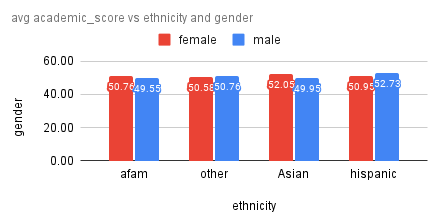

###### Wealth

In [6]:
# Percentage of students who have a home and who don't
query3 = '''
SELECT
ROUND(SUM(CASE WHEN home = 'yes' THEN 1
ELSE 0 END) * 100.0 /COUNT(id), 2)  AS have_home,
ROUND(SUM(CASE WHEN home = 'no' THEN 1
ELSE 0 END) * 100.0 /COUNT(id), 2) AS not_have_home
FROM reports_student_colleges
'''
df = pd.read_sql_query(query3, connection)
df

,have_home,not_have_home
0,82.34,17.66


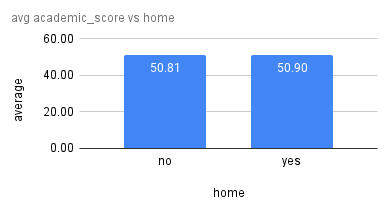

Although most students have homes (82.34%), the average academic score is still very similar in the two groups. It implies that having a home might not play a role in academic performance.

In [7]:
# Percentage of students who have low income and who have high income*/
query4 = '''
SELECT
ROUND(SUM(CASE WHEN income = 'high' THEN 1
ELSE 0 END) * 100.0 /COUNT(id), 2)  AS high_income,
ROUND(SUM(CASE WHEN income = 'low' THEN 1
ELSE 0 END) * 100.0 /COUNT(id), 2) AS low_income
FROM reports_student_colleges
'''
df = pd.read_sql_query(query4, connection)
df

,high_income,low_income
0,27.86,72.14


Most students have low income, but average academic score remains roughly the same.

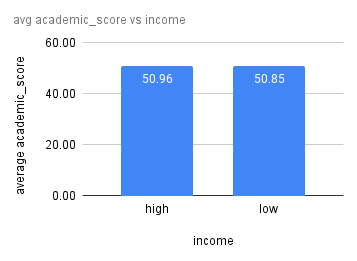

In [8]:
# Any relationship between student tuition and performance? 
query5 = '''
SELECT student_tuition, AVG(academic_score)
FROM reports_student_colleges
GROUP BY student_tuition
ORDER BY student_tuition DESC
'''
df = pd.read_sql_query(query5, connection)
df.head()

,student_tuition,AVG(academic_score)
0,119987,40.439999
1,119966,55.150002
2,119935,37.029999
3,119933,51.290001
4,119914,48.549999


*NB: Dataset has over 4000 rows, that's why I am displaying only the 1st 5 rows in this report.<br>*
In observing the entire output on SQLite, the results appear to be random with no inclination that tuition affects academic score as no apparent trend is observed. However, when I plotted a chart, a somewhat normal distribution was observed with students with either very low or very high tuition performing poorer than students with average tuition.

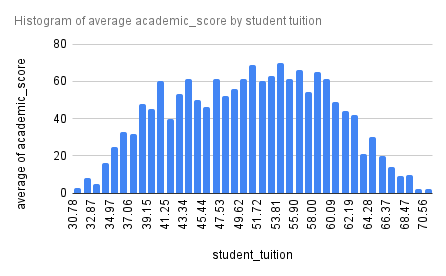

###### Location

In [9]:
# urban
query6 = '''
SELECT urban, AVG(academic_score)
FROM reports_student_colleges
GROUP BY urban 
'''
df = pd.read_sql_query(query6, connection)
df

,urban,AVG(academic_score)
0,no,50.932184
1,yes,50.657495


Not much difference in student average academic scores irrespective of if the student lives in an urban area or not.

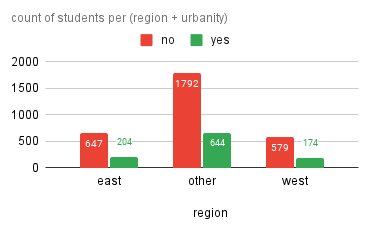

<br>Graph shows that most students live in non urban areas in all the three regions in the dataset; with most students living in 'other'

In [10]:
# distance
query7 = ''' 
SELECT distance, AVG(academic_score)
FROM reports_student_colleges
GROUP BY distance
ORDER BY distance ASC
'''
df = pd.read_sql_query(query7, connection)
df.head() # displaying just top 5 rows to save memory; graph tells better story

,distance,AVG(academic_score)
0,0.0,54.482206
1,0.1,51.242104
2,0.2,49.792537
3,0.3,50.600000
4,0.4,50.268310


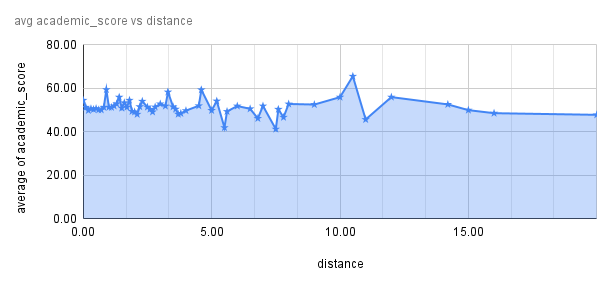

Graph shows that most students live with 50 miles (5x10) to a four year college. The academic scores ranged between 41.9 as the lowest score and 65.51 as the highest. This difference appears to be irrespective of the distance to a college that a student lived. Most students performed similarly to each other.

It would be interesting to see the proportion of students who lived in urban places by ethnicity.<br>
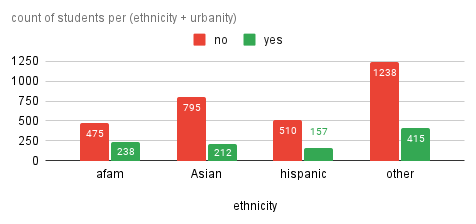

33.38% of African Americans, 21.05% of Asians, 23.54% of Hispanics and 25.12% of other lived in urban areas 

##### Education

In [11]:
# mother's education, father's education, years of education 
query8 = '''
SELECT mcollege, fcollege, education, academic_score
FROM reports_student_colleges
'''
df = pd.read_sql_query(query8, connection)
df.head() # displaying just top 5 rows to save memory; graph tells better story

,mcollege,fcollege,education,academic_score
0,no,no,12,39.150002
1,yes,yes,12,39.150002
2,no,no,12,39.150002
3,yes,yes,12,39.150002
4,no,no,12,39.150002


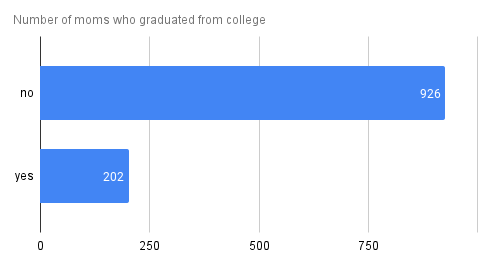

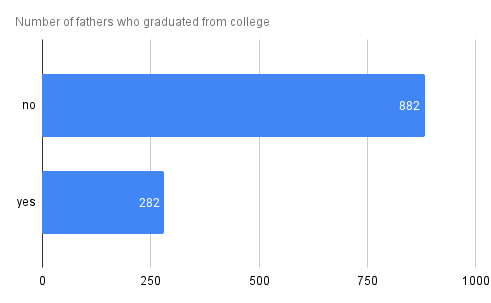

<br>24.23% of dads graduated while 17.91% of moms graduated.<br>

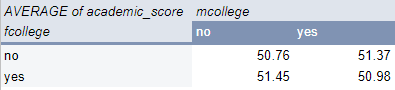

The contigency table above shows that the student's average academic score was similar regardless of whether a student's mother or father graduated from college.

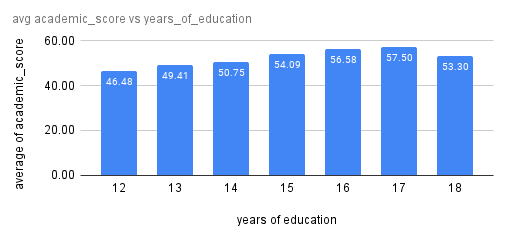

The graph above shows that student's academic performance improved with the number of years but declined on the 18th year. It is not clear if the number of years is as a result of repeating classes or pursuing higher education.

Education, wealth, location, and physiological qualities were all factors that were considered in determining the academic scores of students.
The results showed consistently that students performed similarly and had similar average academic scores. A plausible explanation for this is that most people are average. If the data collection was done right and data is balanced, these results might be a reflection of real life where most people perform similarly to each other with few people performing terribly or extremely well.

I had found it fascinating that the graph of average academic score to student tuition was a bell shape, implying that with very low or very high tuition fees resulted in very poor performance. It would be interesting to look deeper into this and understand the reasons for this trend.

It was also interesting to see that most students lived within 50 miles to 4-year universities. Since parent information was included in the dataset, I am assuming that the academic performance data provided were for high school students and not university students. It will not be unusual for university students to live near a university campus but it is intriguing for high school students.